In [161]:
N = ord("I") % 3 + 1
print(f"My variant is: {N}")

My variant is: 2


<h1>Tasks 1 and 2</h1>

In [15]:
import csv
import numpy as np

In [89]:
def read_csv_column(filename, column_name):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        headers = next(reader)  # Skip the first row
        column_index = headers.index(column_name)  # Find the index of the column
        column_data = [row[column_index] for row in reader if row[column_index]]  # Get the column values
        return np.array(column_data, dtype=float)  # Return as numpy array

filename = 'russia_losses_equipment.csv'
tank_data = read_csv_column(filename, 'tank')

print(tank_data)


[8869. 8860. 8846. 8825. 8815. 8800. 8784. 8768. 8746. 8725. 8705. 8691.
 8685. 8683. 8680. 8674. 8671. 8653. 8642. 8640. 8639. 8636. 8632. 8631.
 8624. 8618. 8611. 8601. 8592. 8582. 8574. 8571. 8568. 8563. 8551. 8547.
 8542. 8533. 8529. 8522. 8518. 8513. 8508. 8501. 8496. 8484. 8476. 8455.
 8450. 8447. 8441. 8434. 8431. 8429. 8421. 8417. 8411. 8406. 8402. 8399.
 8390. 8381. 8356. 8344. 8331. 8320. 8313. 8302. 8288. 8284. 8266. 8257.
 8250. 8245. 8238. 8227. 8214. 8206. 8199. 8191. 8182. 8180. 8178. 8171.
 8155. 8153. 8142. 8132. 8123. 8107. 8099. 8080. 8073. 8066. 8042. 8039.
 8035. 8031. 8019. 8009. 8001. 7987. 7984. 7974. 7958. 7956. 7956. 7936.
 7928. 7911. 7902. 7879. 7869. 7843. 7834. 7828. 7806. 7794. 7779. 7765.
 7740. 7728. 7710. 7700. 7692. 7671. 7662. 7650. 7635. 7622. 7611. 7605.
 7590. 7576. 7560. 7547. 7529. 7510. 7496. 7485. 7454. 7449. 7434. 7429.
 7418. 7405. 7380. 7375. 7366. 7354. 7332. 7312. 7307. 7285. 7279. 7268.
 7262. 7255. 7242. 7241. 7236. 7229. 7213. 7205. 71

<h1>Task 3</h1>

In [163]:
#Find daily tanks losses
daily_losses = np.diff(tank_data)
print(daily_losses)

[ -9. -14. -21. -10. -15. -16. -16. -22. -21. -20. -14.  -6.  -2.  -3.
  -6.  -3. -18. -11.  -2.  -1.  -3.  -4.  -1.  -7.  -6.  -7. -10.  -9.
 -10.  -8.  -3.  -3.  -5. -12.  -4.  -5.  -9.  -4.  -7.  -4.  -5.  -5.
  -7.  -5. -12.  -8. -21.  -5.  -3.  -6.  -7.  -3.  -2.  -8.  -4.  -6.
  -5.  -4.  -3.  -9.  -9. -25. -12. -13. -11.  -7. -11. -14.  -4. -18.
  -9.  -7.  -5.  -7. -11. -13.  -8.  -7.  -8.  -9.  -2.  -2.  -7. -16.
  -2. -11. -10.  -9. -16.  -8. -19.  -7.  -7. -24.  -3.  -4.  -4. -12.
 -10.  -8. -14.  -3. -10. -16.  -2.   0. -20.  -8. -17.  -9. -23. -10.
 -26.  -9.  -6. -22. -12. -15. -14. -25. -12. -18. -10.  -8. -21.  -9.
 -12. -15. -13. -11.  -6. -15. -14. -16. -13. -18. -19. -14. -11. -31.
  -5. -15.  -5. -11. -13. -25.  -5.  -9. -12. -22. -20.  -5. -22.  -6.
 -11.  -6.  -7. -13.  -1.  -5.  -7. -16.  -8.  -9.  -3.  -4.  -9.  -6.
  -5. -23.  -9.  -5. -22. -23. -13. -17. -24. -15.  -9. -11. -12. -20.
 -15. -29.  -8. -10. -11.  -6. -11. -24. -12.  -8.  -4.  -9. -10. -19.
 -11. 

<h1>Task 4</h1>

In [165]:
#Find the 4 greatest daily losses of tanks
four_greatest_losses = np.sort(daily_losses)[:4]
print(four_greatest_losses)

[-66. -55. -48. -44.]


<h1>Task 5</h1>

In [159]:
import csv
import numpy as np
from datetime import datetime

def read_csv_column(filename, column_name):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        headers = next(reader) 
        column_index = headers.index(column_name)
        column_data = [row[column_index] for row in reader if row[column_index]]
        
        # Handle date and numerical data separately
        if column_name == 'date':
            return np.array(column_data)
        else:
            return np.array(column_data, dtype=float) 

filename = 'russia_losses_equipment.csv'
date_data = read_csv_column(filename, 'date') 
tank_data = read_csv_column(filename, 'tank')

# Convert date strings to datetime objects for filtering
dates_as_dt = np.array([datetime.strptime(date, '%Y-%m-%d') for date in date_data])


first_day_of_spring = datetime(2024, 3, 1)
last_day_of_spring = datetime(2024, 5, 31)

first_day_mask = (dates_as_dt == first_day_of_spring)
tank_losses_first_day = tank_data[first_day_mask]

last_day_mask = (dates_as_dt == last_day_of_spring)
tank_losses_last_day = tank_data[last_day_mask]

difference = tank_losses_last_day.sum() - tank_losses_first_day.sum()

print(f"Tanks destroyed in the spring of 2024: {int(difference)}")


Tanks destroyed in the spring of 2024: 1118


<h1>Task 6</h1>

In [157]:
mean_last_100_days = np.sum(daily_losses[:100])
print(f"Mean value of destroyed tanks in the last 100 days of war: {int(abs(mean_last_100_days))}")

Mean value of destroyed tanks in the last 100 days of war: 868


<h1>Task 7</h1>

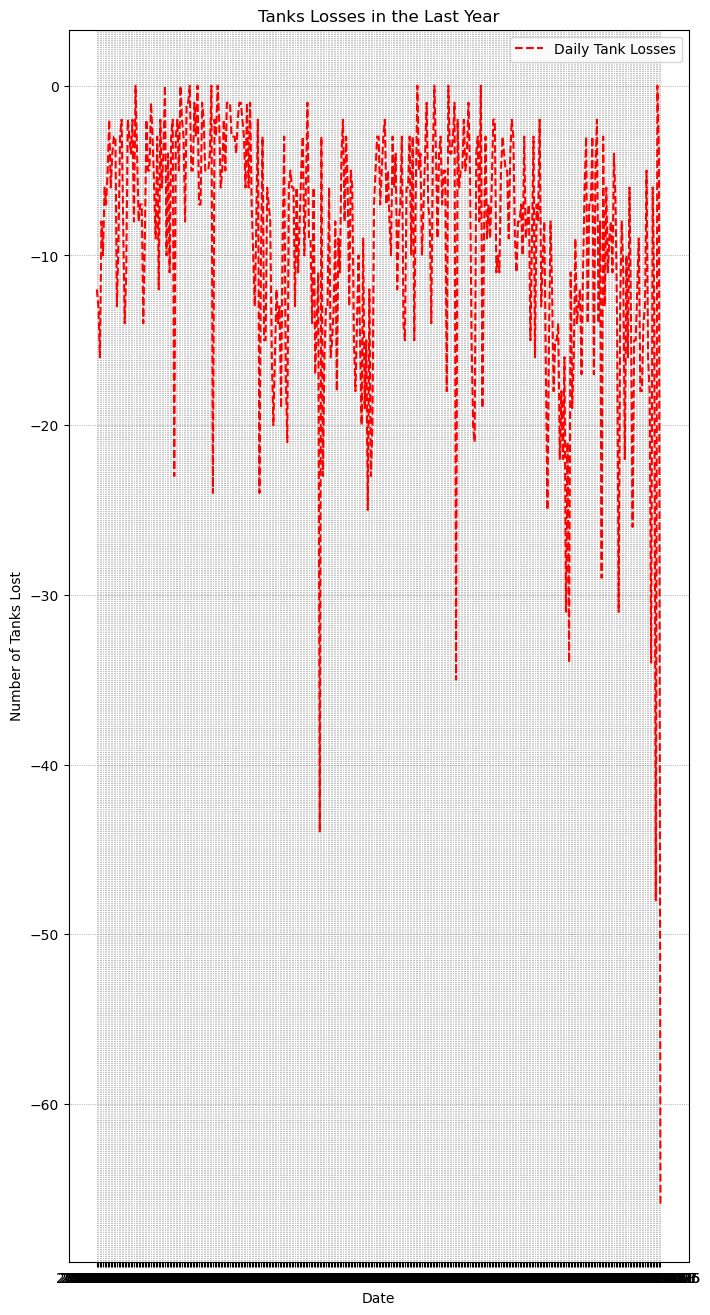

In [191]:
import matplotlib.pyplot as plt

# Plotting tanks losses for the last year (starting from the last date)
def plot_tank_losses(daily_losses, date_data):
    # Select last 365 days data 
    losses_last_year = daily_losses[-365:]
    dates_last_year = date_data[-365:]

    
    plt.figure(figsize=(8, 16), dpi=100)
    plt.plot(dates_last_year, losses_last_year, linestyle='--', label='Daily Tank Losses', color='red')
    
    plt.title('Tanks Losses in the Last Year')
    plt.xlabel('Date')
    plt.ylabel('Number of Tanks Lost')
    plt.grid(True, which='both', color='gray', linestyle=':', linewidth=0.5)
    plt.legend(loc='upper right')
    

    plt.savefig('tank_losses_last_year.png')
    plt.show()


date_data = read_csv_column(filename, 'date')
plot_tank_losses(daily_losses, date_data)

